In [1]:
import gym
import gym_jumping_task
from gym_jumping_task.envs.jumping_task import JumpTaskEnv
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.utils import make_grid
import torch.nn as nn
import augmentations
from env import VanillaEnv

In [2]:
device = torch.device('cpu')

env =  VanillaEnv()

Done! Episode Reward:  24.0


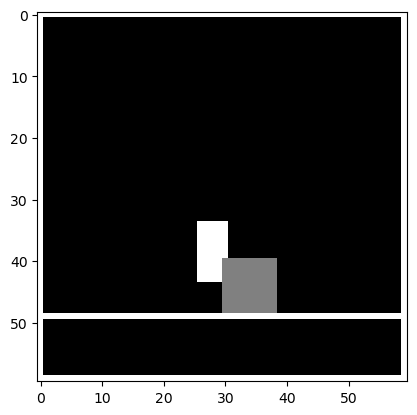

In [3]:
done = False
rewards = []
frames_arr = []

state = env.reset()
while not done:
    action = np.random.randint(low=0, high=2)
    next_state, r, done, info = env.step(action)
    rewards.append(r)
    frames_arr.append(np.expand_dims(np.flipud(state.squeeze()), axis=0))
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        plt.imshow(np.flipud(state.squeeze()), cmap='gray', vmin=0., vmax=1.)
        break

# Augmentations

In [4]:
# convert the frames from [0., 1.] to [0, 255]
# frames = np.array(np.array(frames) * 255, dtype=np.uint8)
# Convert the frame stack into the correct format (B, C, H, W)
frames = np.array(frames_arr)
if len(frames.shape) == 3: frames = np.expand_dims(frames, axis=1)
frames = torch.from_numpy(frames)

print(frames.shape)
print(frames.dtype)
print(frames.min(), frames.max())

torch.Size([26, 1, 60, 60])
torch.float32
tensor(0.) tensor(1.)


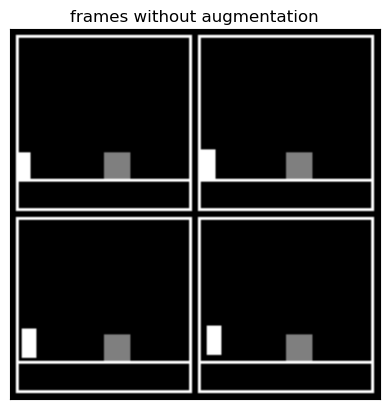

In [5]:
def show_imgs(x, max_display=16, title:str = ""):
    n_cols = 2 if max_display == 4 else 4
    grid = make_grid(x[:max_display],n_cols).permute(1,2,0).cpu().numpy()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(grid)
    if len(title) > 0: plt.title(title)
    plt.show()

show_imgs(frames, title="frames without augmentation", max_display=4)

torch.Size([26, 1, 60, 60])


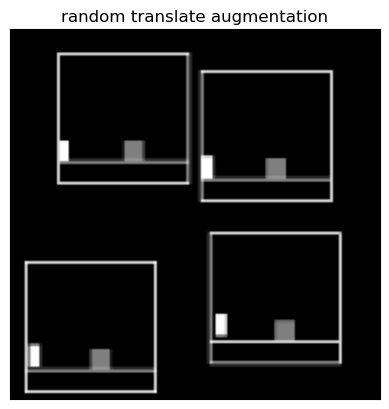

In [12]:
rnd_trans = augmentations.random_translate(frames,80)
print(rnd_trans.shape)
show_imgs(rnd_trans, title="random translate augmentation", max_display=4)

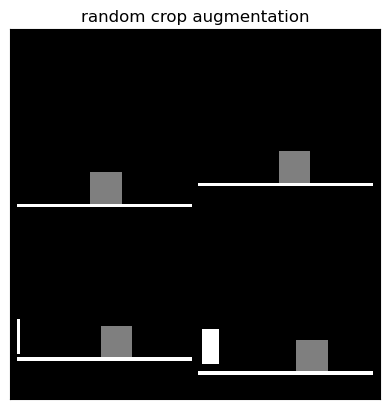

In [7]:
cropped_x = augmentations.random_crop(frames,50)
show_imgs(cropped_x, title="random crop augmentation", max_display=4)

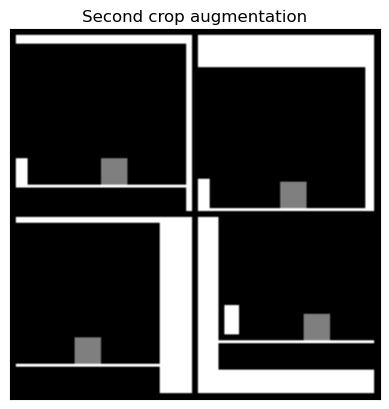

In [8]:
cropped2_x = augmentations.random_crop2(frames, padding=10)
show_imgs(cropped2_x, title="Second crop augmentation", max_display=4)

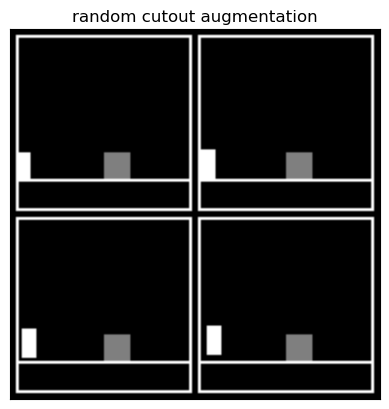

In [9]:
cut_x = augmentations.random_cutout(frames,10,25)
show_imgs(cut_x, title="random cutout augmentation", max_display=4)

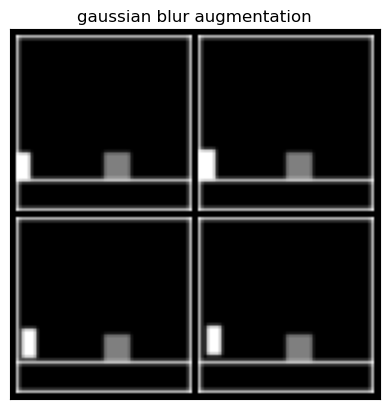

In [10]:
gaussian_blur = augmentations.gaussian_blur(frames, kernel_size=3, sigma=0.6)
show_imgs(gaussian_blur, title="gaussian blur augmentation", max_display=4)

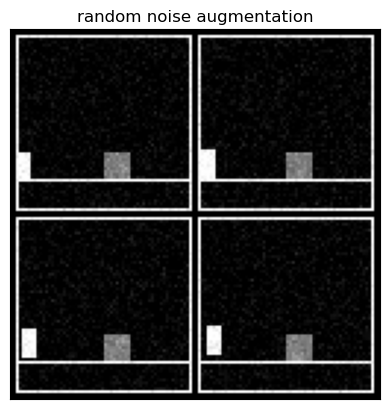

In [11]:
rnd_noise = augmentations.random_noise(frames)
show_imgs(rnd_noise, title="random noise augmentation", max_display=4)